In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Введення зміних

In [3]:
wavelength = 2.8e-02  # Довжина хвилі в метрах
a_r = 13e-02   # Розмір рупора по осі a в метрах
b_r = 13e-02   # Розмір рупора по осі b в метрах
theta = np.arange(0.01, np.pi / 2, 0.01)  # Кути theta для розрахунків

# Векторні обчислення

In [12]:
def calculate_FH(theta, wavelength, a_r):
    F1h = abs((1 + np.cos(theta)) / 2)
    FC = abs(np.cos((np.pi * a_r * np.sin(theta)) / wavelength) / (1 - ((2 * a_r * np.sin(theta)) / wavelength)**2))
    FH = F1h * FC
    return F1h, FC, FH

def calculate_FE(theta, wavelength, b_r):
    F1e = abs((1 + np.cos(theta)) / 2)
    FC = abs(np.sin((np.pi * b_r * np.sin(theta)) / wavelength) / ((np.pi * b_r * np.sin(theta)) / wavelength))
    FE = F1e * FC
    return F1e, FC, FE

# Розрахунки площин H та E

In [13]:
F1h, FC_H, FH = calculate_FH(theta, wavelength, a_r)
F1e, FC_E, FE = calculate_FE(theta, wavelength, b_r)

# Інтерполяція для визначення ШГП

In [14]:
interp_FH = interp1d(FH, theta, kind='linear', bounds_error=False, fill_value='extrapolate')
interp_FE = interp1d(FE, theta, kind='linear', bounds_error=False, fill_value='extrapolate')

# Пошук ШГП у площинах H та E

In [34]:
SGP1 = 2 * np.degrees(interp_FH(0.707))
SGP2 = 2 * np.degrees(interp_FE(0.707))
print(f"ШГП у площині Н = {round(SGP1, 3)}")
print(f"ШГП у площині Е = {round(SGP2, 3)}")

ШГП у площині Н = 14.629
ШГП у площині Е = 10.909


# Пошук максимумів і нульових кутів

In [21]:
# Векторне знаходження максимумів та мінімумів
def find_peaks_and_troughs(F, theta):
    # Обчислюємо різниці між сусідніми значеннями
    d_F = np.diff(F)
    
    peaks_idx = np.where((d_F[:-1] > 0) & (d_F[1:] < 0))[0] + 1
    troughs_idx = np.where((d_F[:-1] < 0) & (d_F[1:] > 0))[0] + 1
    
    peaks_x = np.round(np.degrees(theta[peaks_idx]), 2)
    peaks_y = F[peaks_idx]
    troughs_x = np.round(np.degrees(theta[troughs_idx]), 2)
    troughs_y = np.zeros_like(troughs_x)
    
    return peaks_x, peaks_y, troughs_x, troughs_y

max_x_FH, max_y_FH, min_x_FH, min_y_FH = find_peaks_and_troughs(FH, theta)
max_x_FE, max_y_FE, min_x_FE, min_y_FE = find_peaks_and_troughs(FE, theta)

print(f"Значення нульових кутів в площині H: {', '.join(map(str, min_x_FH))} \u00b0")
print(f"Значення нульових кутів в площині E: {', '.join(map(str, min_x_FE))} \u00b0")

Значення нульових кутів в площині H: 18.91, 32.66, 48.7, 75.63 °
Значення нульових кутів в площині E: 12.61, 25.78, 40.11, 59.59 °


# Побудова діаграми спрямованості пірамідального рупора для площини H

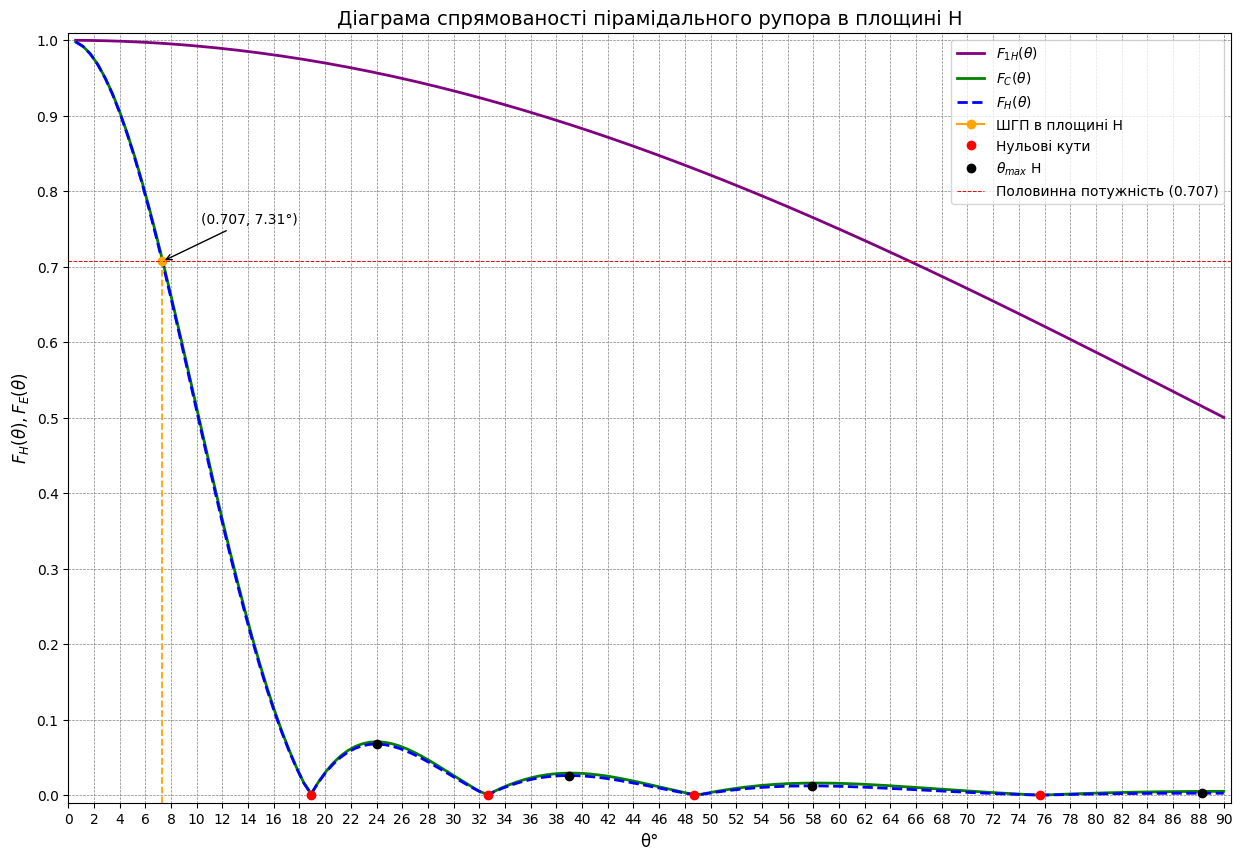

In [31]:
# графік для площини H
plt.figure(figsize=(15, 10))

# графіки ДС для H
plt.plot(np.degrees(theta), F1h, label="$ F_{1H}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(np.degrees(theta), FC_H, label="$ F_{C}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(np.degrees(theta), FH, label="$ F_{H}(θ) $", linestyle="dashed", color="blue", linewidth=2)
plt.plot(SGP1 / 2, 0.707, marker="o", color='orange', label="ШГП в площині H")

plt.annotate(f'(0.707, {SGP1 / 2:.2f}\u00b0)',xy=(SGP1 / 2, 0.707),xytext=((SGP1 / 2) + 3, 0.757),arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# нульові кути
plt.plot(min_x_FH, min_y_FH, 'ro', label="Нульові кути")

# максимуми
plt.plot(max_x_FH, max_y_FH, "o", color="black", label="$ \\theta_{max} $ H")

plt.axhline(y=0.707, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)
plt.axvline(x=SGP1 / 2, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=1.3)

plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
plt.title("Діаграма спрямованості пірамідального рупора в площині H", fontsize=14)
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 90.5)
plt.show()


# Побудова діаграми спрямованості пірамідального рупора для площини E

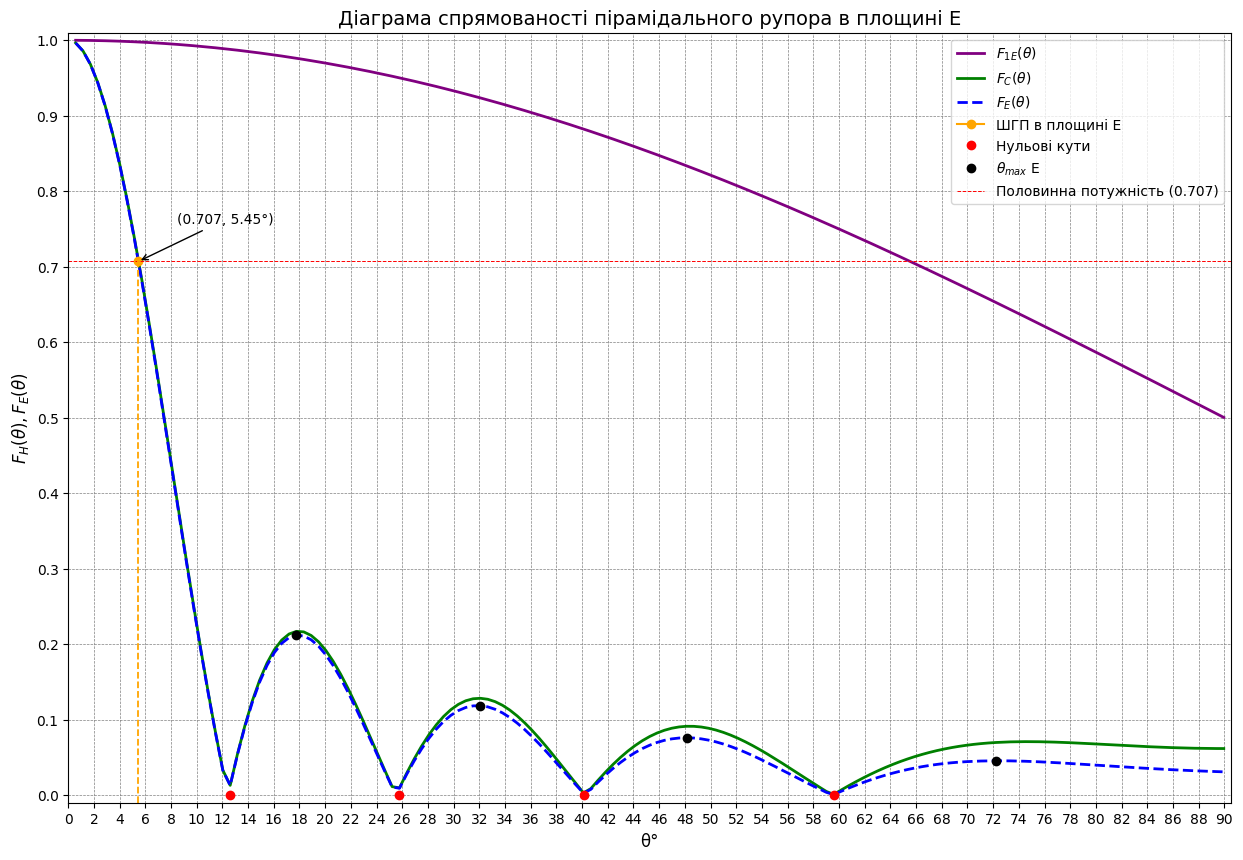

In [32]:
plt.figure(figsize=(15, 10))

# Побудова графіків ДС для E
plt.plot(np.degrees(theta), F1e, label="$ F_{1E}(θ) $", linestyle="solid", color="purple", linewidth=2)
plt.plot(np.degrees(theta), FC_E, label="$ F_{C}(θ) $", linestyle="solid", color="green", linewidth=2)
plt.plot(np.degrees(theta), FE, label="$ F_{E}(θ) $", linestyle="dashed", color="blue", linewidth=2)
plt.plot(SGP2 / 2, 0.707, marker="o", color='orange', label="ШГП в площині E")

plt.annotate(f'(0.707, {SGP2 / 2:.2f}\u00b0)', xy=(SGP2 / 2, 0.707), xytext=((SGP2 / 2) + 3, 0.757),arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

plt.plot(min_x_FE, min_y_FE, 'ro', label="Нульові кути")
plt.plot(max_x_FE, max_y_FE, "o", color="black", label="$ \\theta_{max} $ E")

plt.axhline(y=0.707, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=0.7)
plt.axvline(x=SGP2 / 2, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=1.3)

plt.xlabel("θ" + '\u00b0', fontsize=12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5, color='gray')
plt.title("Діаграма спрямованості пірамідального рупора в площині E", fontsize=14)
plt.xticks(np.arange(0, 100, 2), fontsize=10)
plt.yticks(np.arange(0, 1.2, 0.1), fontsize=10)
plt.ylim(-0.01, 1.01)
plt.xlim(0, 90.5)
plt.show()
